# Agriculture Data Analysis and Model Training

This notebook demonstrates the process of loading, preprocessing, analyzing, and training machine learning models on agricultural data. We will perform regression and classification tasks using both traditional machine learning and deep learning approaches.

## 1. Data Loading and Preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load the dataset
df = pd.read_csv('combined_data_june_2024.csv')

# Display the first few rows of the dataframe
df.head()

2024-08-14 18:55:22.446113: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-14 18:55:22.458949: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-14 18:55:22.462719: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-14 18:55:22.473174: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-08-14 18:55:23.129874: W tensorflow/compiler/tf2

,timestamp,soil_moisture,soil_nutrients,soil_ph,sensor_id,temperature_x,humidity_x,date_x,temperature_y,humidity_y,rainfall,date_y,crop,price_per_unit,yield_per_hectare,water_usage,carbon_emission
0,2024-06-01,32.5,45.2,6.8,1,27.0,64,2024-06-01,28.5,65,2.1,2024-06-01,Wheat,5.2,3500,1500,200
1,2024-06-01,32.5,45.2,6.8,1,27.0,64,2024-06-01,28.5,65,2.1,2024-06-01,Wheat,5.2,3550,1500,200
2,2024-06-01,32.5,45.2,6.8,1,27.0,64,2024-06-01,28.5,65,2.1,2024-06-01,Wheat,5.2,3600,1500,200
3,2024-06-01,32.5,45.2,6.8,1,27.0,64,2024-06-01,28.5,65,2.1,2024-06-01,Wheat,5.2,3650,1500,200
4,2024-06-01,32.5,45.2,6.8,1,27.0,64,2024-06-01,28.5,65,2.1,2024-06-01,Wheat,5.2,3700,1500,200


## 2. Feature and Target Preparation

In [2]:
# Drop timestamp and date columns
df = df.drop(columns=['timestamp', 'date_x', 'date_y'])

# Encode 'crop' column
label_encoder = LabelEncoder()
df['crop'] = label_encoder.fit_transform(df['crop'])

# Display the cleaned dataframe
df.head()


,soil_moisture,soil_nutrients,soil_ph,sensor_id,temperature_x,humidity_x,temperature_y,humidity_y,rainfall,crop,price_per_unit,yield_per_hectare,water_usage,carbon_emission
0,32.5,45.2,6.8,1,27.0,64,28.5,65,2.1,1,5.2,3500,1500,200
1,32.5,45.2,6.8,1,27.0,64,28.5,65,2.1,1,5.2,3550,1500,200
2,32.5,45.2,6.8,1,27.0,64,28.5,65,2.1,1,5.2,3600,1500,200
3,32.5,45.2,6.8,1,27.0,64,28.5,65,2.1,1,5.2,3650,1500,200
4,32.5,45.2,6.8,1,27.0,64,28.5,65,2.1,1,5.2,3700,1500,200


In [3]:
# Define numerical features
numerical_features = ['soil_moisture', 'soil_nutrients', 'soil_ph', 'temperature_x', 
                       'humidity_x', 'temperature_y', 'humidity_y', 'rainfall', 
                       'price_per_unit', 'yield_per_hectare', 'water_usage', 
                       'carbon_emission']

# Ensure all features are numerical
imputer = SimpleImputer(strategy='median')
df[numerical_features] = imputer.fit_transform(df[numerical_features])

# Separate features and targets
X = df.drop(columns=['yield_per_hectare', 'crop'])
y_regression = df['yield_per_hectare']
y_classification = df['crop']

# Split the data for regression and classification
X_train, X_test, y_train_reg, y_test_reg = train_test_split(X, y_regression, test_size=0.2, random_state=42)
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(X, y_classification, test_size=0.2, random_state=42)


## 3. Regression Model Training and Evaluation

In [4]:
# Regression Model
print("Regression Model Training...")
regressor = LinearRegression()
regressor.fit(X_train, y_train_reg)
y_pred_reg = regressor.predict(X_test)

mse = mean_squared_error(y_test_reg, y_pred_reg)
r2 = r2_score(y_test_reg, y_pred_reg)

print(f'Regression Model - Mean Squared Error: {mse}')
print(f'Regression Model - R^2 Score: {r2}')


Regression Model Training...
Regression Model - Mean Squared Error: 14696.53721794829
Regression Model - R^2 Score: 0.820095476119701


## 4. Deep Learning Regression Model

Deep Learning Regression Model Training...
Epoch 1/20


/home/evil/anaconda3/envs/torch/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1723641923.819289   29338 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-08-14 18:55:23.864866: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2343] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your 

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 15219727.0000 - val_loss: 14126942.0000
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 13904230.0000 - val_loss: 13100460.0000
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 12749130.0000 - val_loss: 12156321.0000
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 11989001.0000 - val_loss: 11293035.0000
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 11074642.0000 - val_loss: 10469072.0000
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 10177527.0000 - val_loss: 9743822.0000
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 9452664.0000 - val_loss: 9046617.0000
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 8871094.0000 - val_loss: 8326696.5000
Epoch 9/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 8318694.5000 - val_loss: 7585993.5000
Epoch 10/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 7169291.0000 - val_loss: 6832737.0000
Epoch 11/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6

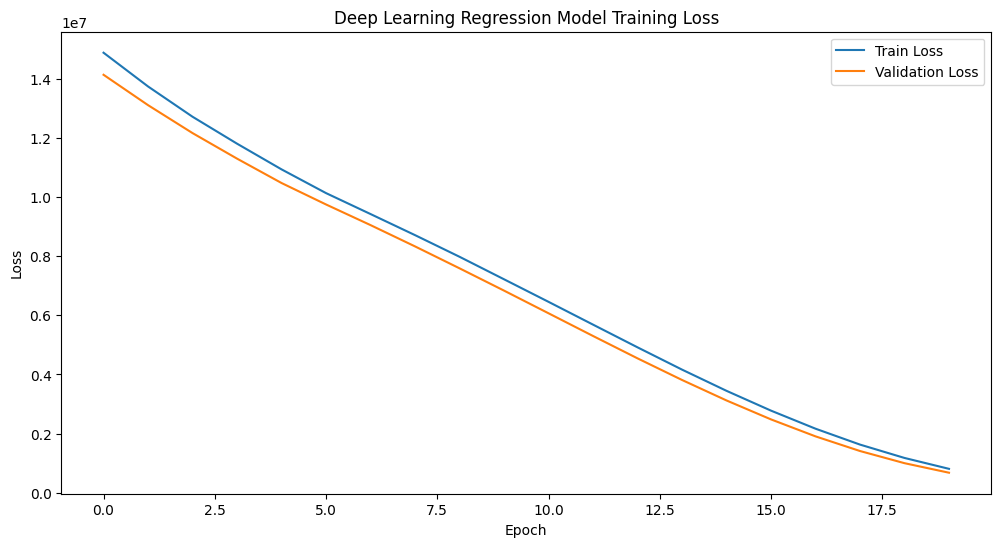

In [5]:
print("Deep Learning Regression Model Training...")
model_reg = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)
])
model_reg.compile(optimizer='adam', loss='mean_squared_error')
history_reg = model_reg.fit(X_train, y_train_reg, epochs=20, batch_size=32, validation_split=0.1)
loss = model_reg.evaluate(X_test, y_test_reg)
print(f'Deep Learning Regression Model - Loss: {loss}')

# Plot training history for regression
plt.figure(figsize=(12, 6))
plt.plot(history_reg.history['loss'], label='Train Loss')
plt.plot(history_reg.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Deep Learning Regression Model Training Loss')
plt.legend()
plt.show()


## 5. Classification Model Training and Evaluation

In [6]:
# Classification Model
print("Classification Model Training...")
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X_train_cls, y_train_cls)
y_pred_cls = classifier.predict(X_test_cls)

accuracy = accuracy_score(y_test_cls, y_pred_cls)
report = classification_report(y_test_cls, y_pred_cls, target_names=label_encoder.classes_)

print(f'Classification Model - Accuracy: {accuracy}')
print('Classification Model - Classification Report:')
print(report)

Classification Model Training...
Classification Model - Accuracy: 1.0
Classification Model - Classification Report:
              precision    recall  f1-score   support

        Corn       1.00      1.00      1.00        20
       Wheat       1.00      1.00      1.00        22

    accuracy                           1.00        42
   macro avg       1.00      1.00      1.00        42
weighted avg       1.00      1.00      1.00        42



## 6. Deep Learning Classification Model

Deep Learning Classification Model Training...
Epoch 1/20


/home/evil/anaconda3/envs/torch/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.5136 - loss: 96.5589 - val_accuracy: 0.4706 - val_loss: 18.8338
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5094 - loss: 19.0766 - val_accuracy: 0.5294 - val_loss: 5.6484
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4850 - loss: 10.1988 - val_accuracy: 0.4706 - val_loss: 6.0255
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4747 - loss: 7.9604 - val_accuracy: 0.5294 - val_loss: 3.9385
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4950 - loss: 4.9551 - val_accuracy: 0.4706 - val_loss: 6.5770
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5417 - loss: 3.9502 - val_accuracy: 0.5294 - val_loss: 0.9427
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4979 - loss: 2.3086 - val_accuracy: 0.5294 - val_loss: 2.2612
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4767 - loss: 2.8754 - val_accuracy: 0.5294 - val_loss: 1.6453
Epoch 9/20
5/5

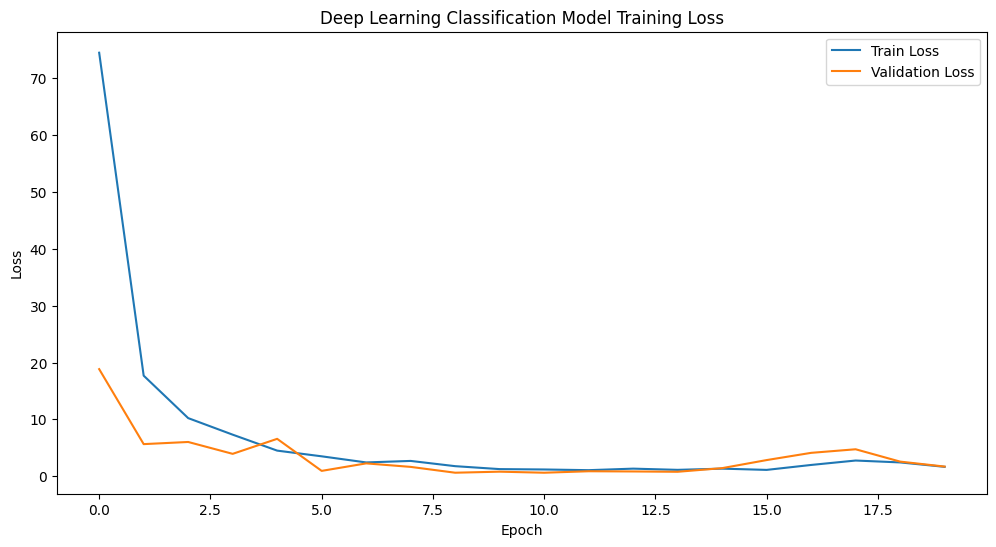

In [7]:
print("Deep Learning Classification Model Training...")
model_cls = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_cls.shape[1],)),
    Dense(32, activation='relu'),
    Dense(len(label_encoder.classes_), activation='softmax')
])
model_cls.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_cls = model_cls.fit(X_train_cls, y_train_cls, epochs=20, batch_size=32, validation_split=0.1)
loss, accuracy = model_cls.evaluate(X_test_cls, y_test_cls)
print(f'Deep Learning Classification Model - Loss: {loss}')
print(f'Deep Learning Classification Model - Accuracy: {accuracy}')

# Plot training history for classification
plt.figure(figsize=(12, 6))
plt.plot(history_cls.history['loss'], label='Train Loss')
plt.plot(history_cls.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Deep Learning Classification Model Training Loss')
plt.legend()
plt.show()

## 7. Visualization

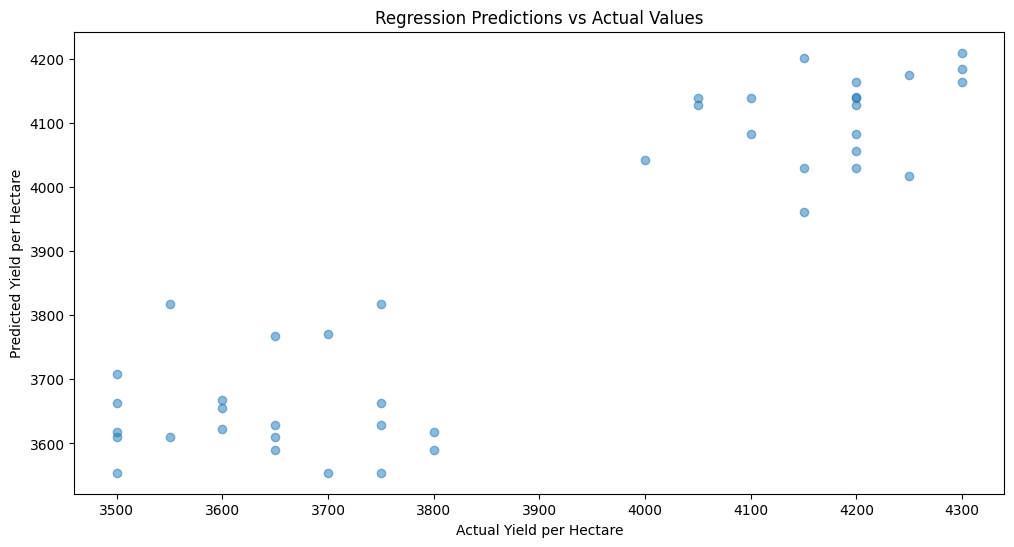

In [8]:
# Example: Visualization of regression predictions vs actual values
plt.figure(figsize=(12, 6))
plt.scatter(y_test_reg, y_pred_reg, alpha=0.5)
plt.xlabel('Actual Yield per Hectare')
plt.ylabel('Predicted Yield per Hectare')
plt.title('Regression Predictions vs Actual Values')
plt.show()

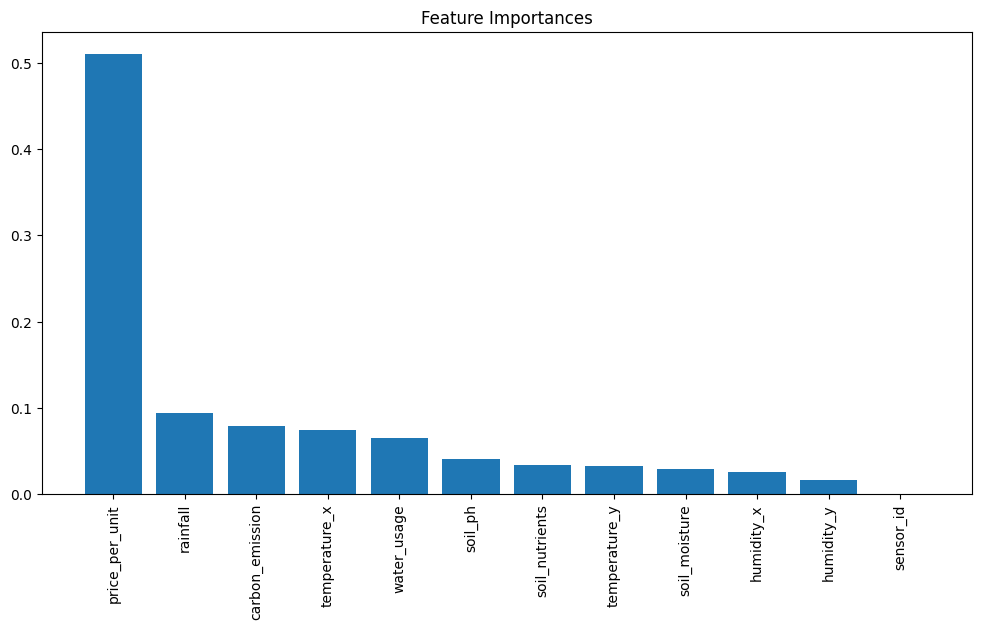

In [9]:
# Example: Feature importance from RandomForestClassifier
importances = classifier.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 6))
plt.title('Feature Importances')
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()